# CSC/XMM counterparts of eROSITA sources

In [158]:
import sys
sys.path.append('../')

In [159]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

import seaborn as sns

from scripts.utils import set_mpl, data_path
from scripts.cross_match_scripts import cross_match_data_frames,  add_separation_columns
set_mpl()

%matplotlib inline
from astropy.table import Table

matplotlib settings set


***

In [160]:
ero_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl')  #6885 sources
ero_df = ero_df.query('DET_LIKE_0>10 & EXT_LIKE<6') #it returns itself, 6885 sources
ero_df = ero_df[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_r98', 'DET_LIKE_0', 'ML_FLUX_0', 'ML_FLUX_ERR_0', 'ML_CTS_0', 'ML_CTS_ERR_0',
       'ML_EXP_1', 'ML_RATE_0', 'ML_RATE_ERR_0']]
ero_columns = list(ero_df.columns)

ero_df

,srcname_fin,RA_fin,DEC_fin,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,ML_RATE_0,ML_RATE_ERR_0
0,SRGe J103744.3+571156,159.434594,57.198788,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,3.594826,0.427379
1,SRGe J110137.5+572926,165.406353,57.490464,2.144203,5344.646973,1.969860e-12,5.570020e-14,1436.945923,40.631405,666.426941,2.156194,0.060969
2,SRGe J110537.6+585120,166.406669,58.855424,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,1.647812,0.100144
3,SRGe J102349.9+563347,155.958041,56.563186,2.027046,32979.832031,1.001123e-12,4.287407e-14,7451.697754,319.126190,6800.098145,1.095822,0.046930
4,SRGe J105057.2+593215,162.738144,59.537414,2.041233,7492.464844,9.137326e-13,2.094327e-14,4687.587402,107.442131,4686.813965,1.000165,0.022924
...,...,...,...,...,...,...,...,...,...,...,...,...
6880,SRGe J102220.8+561850,155.586530,56.314015,8.113349,11.552296,2.266023e-15,6.812360e-16,18.579878,5.585682,7490.763184,0.002480,0.000746
6881,SRGe J104356.5+544209,160.985551,54.702489,7.918975,10.270959,2.238950e-15,6.991167e-16,18.792978,5.868146,7668.293457,0.002451,0.000765
6882,SRGe J104421.8+545706,161.091018,54.951776,7.262971,11.175535,2.180472e-15,6.472189e-16,21.106709,6.265002,8843.365234,0.002387,0.000708
6883,SRGe J104425.6+544105,161.106510,54.684610,7.352581,11.792480,2.177572e-15,6.746889e-16,18.609146,5.765772,7807.310059,0.002384,0.000739


In [161]:
def find_secure_counterparts(erosita, x_ray, x_ray_name):

    ero_x_orig = cross_match_data_frames(erosita, x_ray,
    'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = x_ray_name)
    
    ero_x = ero_x_orig.query(f"{x_ray_name}_n_near==1 & {x_ray_name}_n_matches==1")

    ero_x = ero_x.query(f"{x_ray_name}_secure==True")
    print('SECURITY FILTER APPLIED, ', x_ray_name)
    print('cross-matche: only one X source within 30 arcsec and it is unique for the eROSITA source', ero_x.shape[0])
    assert len(ero_x) == ero_x[f'{x_ray_name}_name'].nunique()

    return ero_x

In [162]:
csc_df = pd.read_pickle(data_path+'csc_all_lh.pkl')
csc_ero = find_secure_counterparts(ero_df, csc_df, 'csc')
csc_ero = csc_ero.query('csc_sep<pos_r98')



cross-match radius 30 arcsec
total matches: 777 out of 6885 x 2329
	 total unique pairs: 722
	 total non-unique pairs (duplicates in df2): 55
SECURITY FILTER APPLIED,  csc
cross-matche: only one X source within 30 arcsec and it is unique for the eROSITA source 461


***

In [163]:
xmm_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
xmm_df.rename(columns={'sc_ra':'ra', 'sc_dec':'dec', 'srcid':'name'}, inplace=True)
xmm_ero = find_secure_counterparts(ero_df, xmm_df, 'xmm')
xmm_ero = xmm_ero.query('xmm_sep<pos_r98')


cross-match radius 30 arcsec
total matches: 839 out of 6885 x 1791
	 total unique pairs: 817
	 total non-unique pairs (duplicates in df2): 22
SECURITY FILTER APPLIED,  xmm
cross-matche: only one X source within 30 arcsec and it is unique for the eROSITA source 646


In [230]:
# add cross match of XMM and csc as control sample
csc_xmm = cross_match_data_frames(csc_df.add_prefix('csc_'), xmm_df,
'csc_ra', 'csc_dec', 'ra', 'dec', match_radius = 5, df_prefix = 'xmm')
csc_xmm = csc_xmm.query("csc_flux_05_2>3e-15 | xmm_flux_05_2>3e-15")
csc_xmm = csc_xmm.query('csc_secure==True & xmm_secure==True')
csc_xmm = csc_xmm.query('xmm_n_near==1 & xmm_n_matches==1')
print('cross-matche: only one X source within 5 arcsec and it is unique for the csc source', csc_xmm.shape[0])

csc_xmm.to_csv(data_path+'csc_xmm.csv', index=False)

cross-match radius 5 arcsec
total matches: 518 out of 2329 x 1791
	 total unique pairs: 510
	 total non-unique pairs (duplicates in df2): 8
cross-matche: only one X source within 5 arcsec and it is unique for the csc source 232


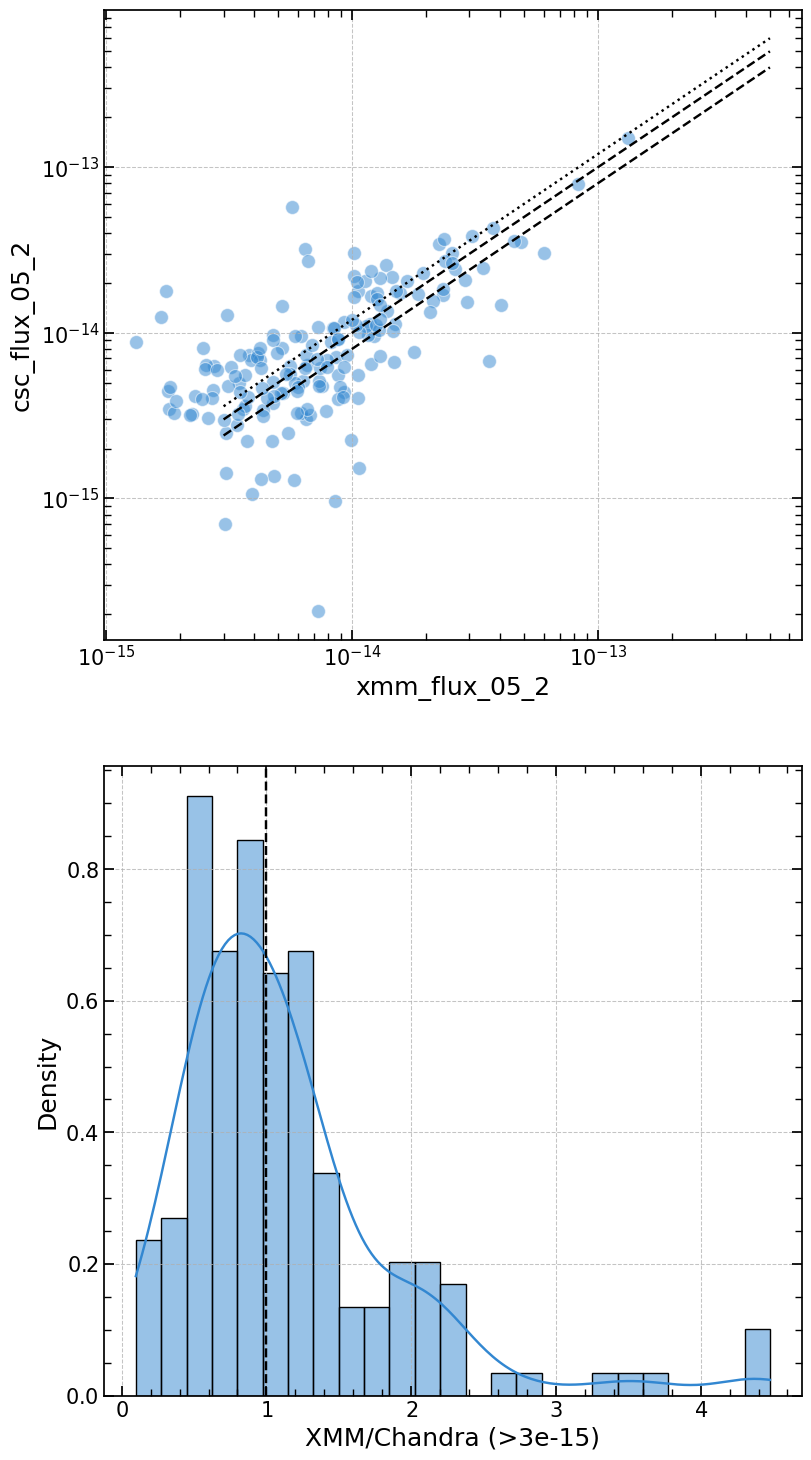

In [234]:
fig,  [ax,ax_hist] =  plt.subplots(2,  figsize = (9,18))


sns.scatterplot(x='xmm_flux_05_2', y='csc_flux_05_2', data=csc_xmm, ax=ax, s=100, alpha=0.5)
#plot 1:1
ax.plot([3e-15, 5e-13], [3e-15, 5e-13], color='k', ls='--')
ax.plot([3e-15, 5e-13], [0.8*3e-15, 0.8*5e-13], color='k', ls='--')
ax.plot([3e-15, 5e-13], [1.2*3e-15, 1.2*5e-13], color='k', ls=':')

rat  = csc_xmm['xmm_flux_05_2']/csc_xmm['csc_flux_05_2']
rat = rat[rat<5]
sns.histplot(rat, ax=ax_hist, bins=25, kde=True, stat='density')
ax_hist.axvline(1, color='k', ls='--')

ax_hist.set_xlabel('XMM/Chandra (>3e-15)')

ax.set_xscale('log')
ax.set_yscale('log')

## Cross-correlate eROSITA with XMM and Chandra

so that for every eROSITA source we have a number of neighbors in XMM and Chandra. 

In [146]:
ero_csc_n_neigh = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
n_chandra_dict = dict(ero_csc_n_neigh.groupby('srcname_fin')['csc_sep'].count())

ero_xmm_n_neigh = cross_match_data_frames(ero_df, xmm_df,
    'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'xmm')
n_xmm_dict = dict(ero_xmm_n_neigh.groupby('srcname_fin')['xmm_sep'].count())

cross-match radius 30 arcsec
total matches: 777 out of 6885 x 2329
	 total unique pairs: 722
	 total non-unique pairs (duplicates in df2): 55
cross-match radius 30 arcsec
total matches: 839 out of 6885 x 1791
	 total unique pairs: 817
	 total non-unique pairs (duplicates in df2): 22


# Joining CSC and XMM counterparts

In [147]:
print('XMM companions', xmm_ero.shape[0])
print('CSC companions', csc_ero.shape[0])
print('Total companions possible', csc_ero.shape[0] + xmm_ero.shape[0])

XMM companions 597
CSC companions 434
Total companions possible 1031


In [148]:
#final_ctps = pd.concat([xmm_ero, csc_ero])
final_ctps = csc_ero.merge(xmm_ero, on=ero_columns, how='outer')

final_ctps['n_csc_neigh'] = final_ctps['srcname_fin'].map(n_chandra_dict, na_action='ignore')
final_ctps['n_xmm_neigh'] = final_ctps['srcname_fin'].map(n_xmm_dict, na_action='ignore')
final_ctps['n_xmm_neigh'] = final_ctps['n_xmm_neigh'].fillna(0)
final_ctps['n_csc_neigh'] = final_ctps['n_csc_neigh'].fillna(0)

final_ctps.sort_values(by='srcname_fin', inplace=True)
final_ctps.reset_index(drop=True, inplace=True)



final_ctps = add_separation_columns(final_ctps, colname_ra1 = 'xmm_ra', colname_dec1 = 'xmm_dec', colname_ra2 = 'csc_ra', colname_dec2 = 'csc_dec', colname = 'sep_xmm_csc')


final_ctps = final_ctps.query(" ( (n_csc_neigh==0 & n_xmm_neigh==1) | (n_csc_neigh==1 & n_xmm_neigh==0) | (n_csc_neigh==1 & n_xmm_neigh==1) )")
print('After removing sources with more than one X-ray neighbor we have ', final_ctps.shape[0], ' sources')

final_ctps = final_ctps.query(" sep_xmm_csc.isna() | sep_xmm_csc < sqrt(xmm_r_98**2+csc_r_98**2) ")

#create a columns named 'best_csc_xmm_flux_err' and 'best_csc_xmm_flux'  that contains the best flux value between csc and xmm (with the largest sns, e.g. xmm_flux_05_2/xmm_flux_05_2_err and csc_flux_05_2/csc_flux_05_2_err)

for row in final_ctps.itertuples():
    if pd.isna(row.csc_flux_05_2):
        final_ctps.loc[row.Index, 'best_csc_xmm_flux'] = row.xmm_flux_05_2
        final_ctps.loc[row.Index, 'best_csc_xmm_flux_err'] = row.xmm_flux_05_2_err

    elif pd.isna(row.xmm_flux_05_2):
        final_ctps.loc[row.Index, 'best_csc_xmm_flux'] = row.csc_flux_05_2
        final_ctps.loc[row.Index, 'best_csc_xmm_flux_err'] = row.csc_flux_05_2_err

    elif row.csc_flux_05_2/row.csc_flux_05_2_err > row.xmm_flux_05_2/row.xmm_flux_05_2_err:
        final_ctps.loc[row.Index, 'best_csc_xmm_flux'] = row.csc_flux_05_2
        final_ctps.loc[row.Index, 'best_csc_xmm_flux_err'] = row.csc_flux_05_2_err
    else:
        final_ctps.loc[row.Index, 'best_csc_xmm_flux'] = row.xmm_flux_05_2
        final_ctps.loc[row.Index, 'best_csc_xmm_flux_err'] = row.xmm_flux_05_2_err



final_ctps

After removing sources with more than one X-ray neighbor we have  858  sources


,srcname_fin,RA_fin,DEC_fin,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,ML_RATE_0,ML_RATE_ERR_0,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,xmm_name,xmm_iauname,xmm_ra,xmm_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,n_csc_neigh,n_xmm_neigh,sep_xmm_csc,best_csc_xmm_flux,best_csc_xmm_flux_err
0,SRGe J103105.9+573747,157.774385,57.629820,8.188158,10.766065,4.369473e-15,1.332926e-15,20.397018,6.222196,4264.666992,0.004783,0.001459,2CXO J103105.7+573749,157.773870,57.630436,2.311181,1.299491,86.663187,3.352941,29.913404,TRUE,False,False,False,False,False,False,False,1.033129e-15,4.893771e-16,1.576882e-15,1.083824e-15,6.021244e-16,1.541439e-15,1.083224,3.029941,2.116953e-15,1.016257e-15,True,2.430322,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2.116953e-15,1.016257e-15
1,SRGe J103118.8+574434,157.828454,57.742797,8.260588,17.952229,6.710993e-15,1.696011e-15,30.985991,7.830819,4218.189453,0.007346,0.001856,2CXO J103118.6+574435,157.827805,57.743201,5.567843,3.681910,93.597864,2.914286,21.474961,MARGINAL,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,7.460705e-16,2.228575e-15,1.375078e-15,3.082072e-15,2.727050,7.627967,2.228575e-15,1.418991e-15,True,1.914688,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2.228575e-15,1.418991e-15
2,SRGe J103121.9+573134,157.841091,57.526169,8.679921,13.835623,5.653947e-15,1.568078e-15,26.608625,7.379696,4299.502930,0.006189,0.001716,2CXO J103121.9+573134,157.841331,57.526115,1.677846,1.161206,76.022015,5.411765,85.236355,TRUE,False,False,False,False,False,False,False,2.735819e-15,1.716592e-15,3.701402e-15,1.127161e-15,6.404321e-16,1.588272e-15,0.833616,2.331750,3.862979e-15,1.555860e-15,True,0.504317,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,3.862979e-15,1.555860e-15
3,SRGe J103123.8+574309,157.849052,57.719110,3.342528,241.302124,3.355341e-14,3.061917e-15,156.710831,14.300646,4266.874023,0.036727,0.003352,2CXO J103123.5+574310,157.848084,57.719446,0.982539,0.834665,114.929794,10.027661,357.109000,TRUE,False,False,False,False,False,False,False,1.163892e-14,1.019785e-14,1.307998e-14,5.811768e-15,5.031770e-15,6.545884e-15,0.526690,1.473232,1.745068e-14,2.302311e-15,True,2.218144,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [149]:
xmm_ero.to_csv(data_path+'ero_xmm.csv')
csc_ero.to_csv(data_path+'ero_csc.csv')
final_ctps.to_csv(data_path+'ero_xmm_csc.csv')

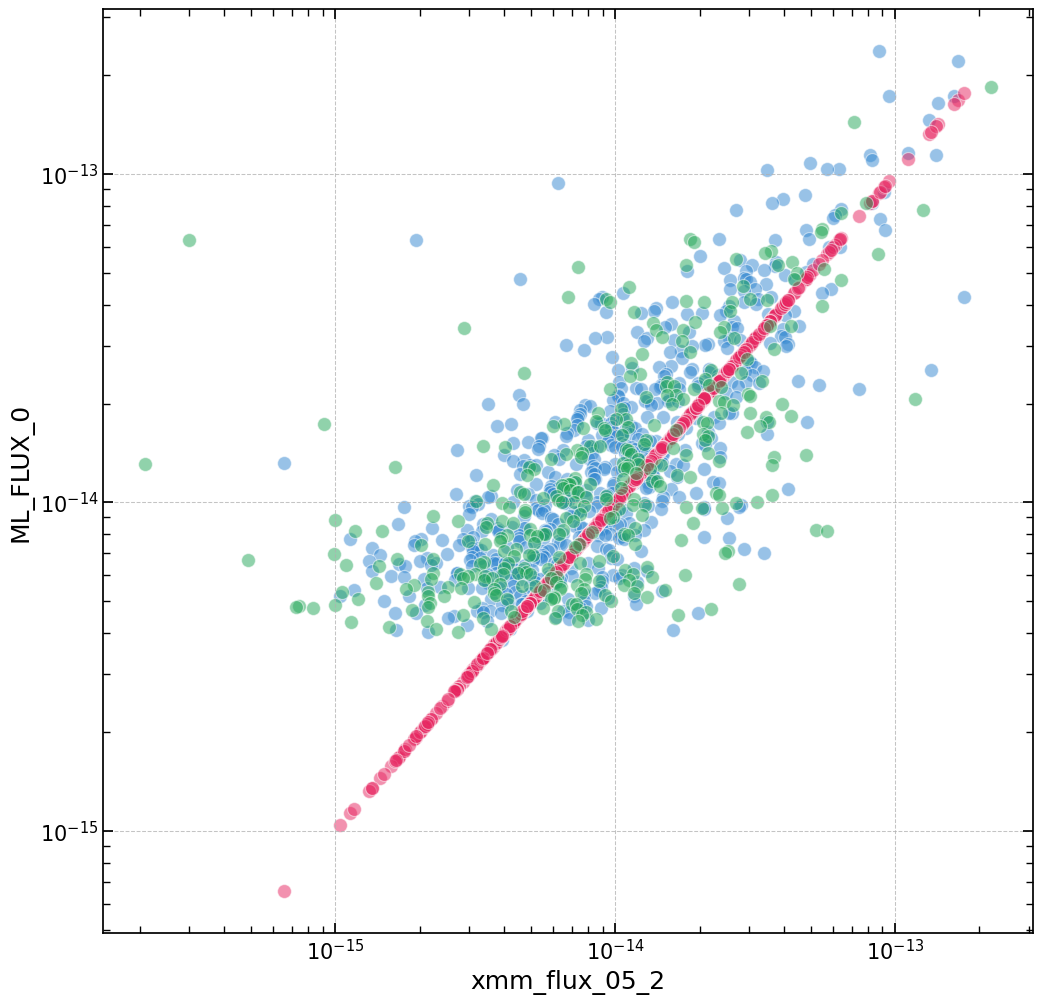

In [157]:
fig,  ax =  plt.subplots( figsize = (12,12))


sns.scatterplot(x='xmm_flux_05_2', y='ML_FLUX_0', data=xmm_ero, ax=ax, s=100, alpha=0.5)
sns.scatterplot(x='xmm_flux_05_2', y='xmm_flux_05_2', data=xmm_ero, ax=ax, s=100, alpha=0.5)

sns.scatterplot(x='csc_flux_05_2', y='ML_FLUX_0', data=csc_ero, ax=ax, s=100, alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')